In [1]:
# This is a Bayesian Neural Network implementation using TensorFlow for a simple y = sin(x) function

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_probability as tfp

(1000, 1)
(1000, 1)


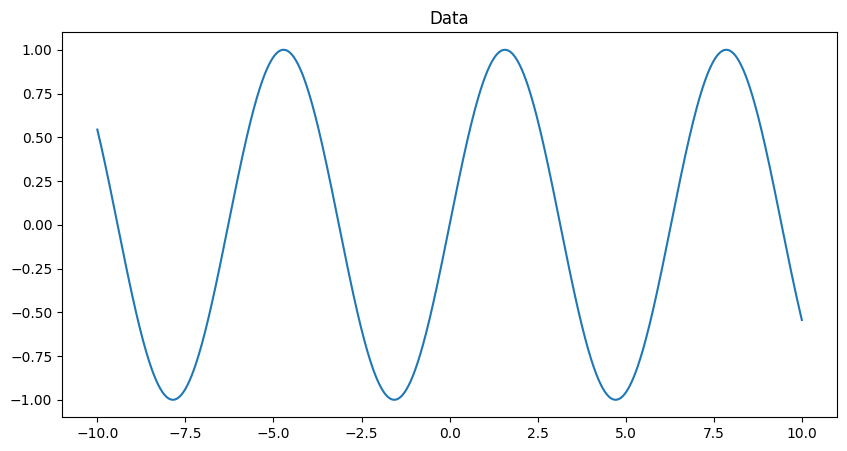

In [2]:
# Generate data
n = 1000
X = np.random.uniform(-10, 10, n)
X = np.linspace(-10, 10, n)
Y = np.sin(X)
X = X.reshape(-1, 1).astype(np.float32)
Y = Y.reshape(-1, 1).astype(np.float32)

print(X.shape)
print(Y.shape)

# Plot data
plt.figure(figsize=(10, 5))
plt.plot(X, Y)
plt.title('Data')
plt.show()

w1 shape: (1, 100)
b1 shape: (100,)
w2 shape: (100, 100)
b2 shape: (100,)
w3 shape: (100, 1)
b3 shape: (1,)


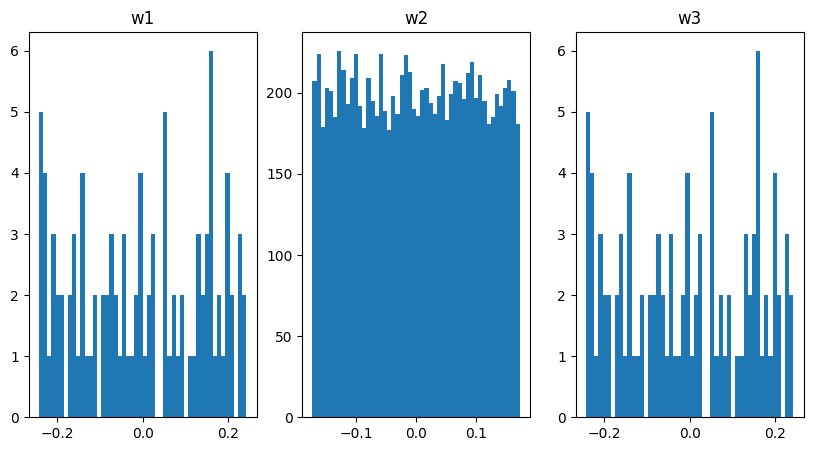

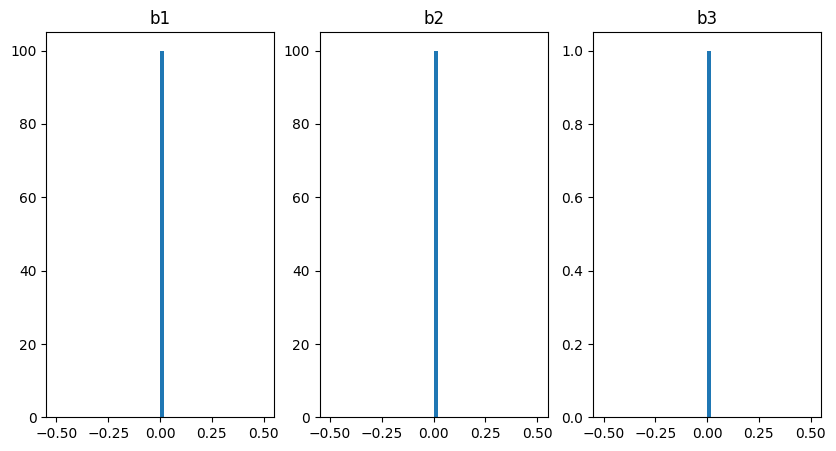

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Initialize the Bayesian neural network
input_dim = 1
hidden1 = 100
hidden2 = 100
output_dim = 1
prior_std = 1.0  # Standard deviation for the prior

# Initialize the weights and biases using Glorot initialization and plot
initializer = tf.initializers.GlorotUniform()
# Different layer uses different sizes
def init_weights(shape):
    return tf.Variable(initializer(shape))
def init_bias(shape):
    return tf.Variable(tf.zeros(shape))

# Initialize the weights and biases
w1 = init_weights([input_dim, hidden1])
b1 = init_bias([hidden1])
w2 = init_weights([hidden1, hidden2])
b2 = init_bias([hidden2])
w3 = init_weights([hidden2, output_dim])
b3 = init_bias([output_dim])

# Print shape
print("w1 shape:", w1.shape)
print("b1 shape:", b1.shape)
print("w2 shape:", w2.shape)
print("b2 shape:", b2.shape)
print("w3 shape:", w3.shape)
print("b3 shape:", b3.shape)

# Plot the weights
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.hist(w1.numpy().ravel(), bins=50)
plt.title('w1')
plt.subplot(1, 3, 2)
plt.hist(w2.numpy().ravel(), bins=50)
plt.title('w2')
plt.subplot(1, 3, 3)
plt.hist(w3.numpy().ravel(), bins=50)
plt.title('w3')
plt.show()

# Plot the biases
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.hist(b1.numpy().ravel(), bins=50)
plt.title('b1')
plt.subplot(1, 3, 2)
plt.hist(b2.numpy().ravel(), bins=50)
plt.title('b2')
plt.subplot(1, 3, 3)
plt.hist(b3.numpy().ravel(), bins=50)
plt.title('b3')
plt.show()

Epoch 1: Negative Log Posterior = 2381.407959
Anti Log Posterior = inf
RMSE: 1.5051980019
----------------------------------------


C:\Users\User\AppData\Local\Temp\ipykernel_53376\1182300548.py:133: RuntimeWarning: overflow encountered in exp
  print(f"Anti Log Posterior = {np.exp(loss.numpy()):.6f}")


Epoch 100: Negative Log Posterior = 254.397049
Anti Log Posterior = inf
RMSE: 0.4846821129
----------------------------------------
Epoch 200: Negative Log Posterior = 152.647598
Anti Log Posterior = inf
RMSE: 0.3649291396
----------------------------------------
Epoch 300: Negative Log Posterior = 92.935837
Anti Log Posterior = inf
RMSE: 0.2651309073
----------------------------------------
Epoch 400: Negative Log Posterior = 32.137634
Anti Log Posterior = 90614406316032.000000
RMSE: 0.0770798177
----------------------------------------
Epoch 500: Negative Log Posterior = 26.260931
Anti Log Posterior = 254084055040.000000
RMSE: 0.0335360393
----------------------------------------
Epoch 600: Negative Log Posterior = 24.311573
Anti Log Posterior = 36172791808.000000
RMSE: 0.0278060213
----------------------------------------
Epoch 700: Negative Log Posterior = 22.880703
Anti Log Posterior = 8648943616.000000
RMSE: 0.0247079656
----------------------------------------
Epoch 800: Negativ

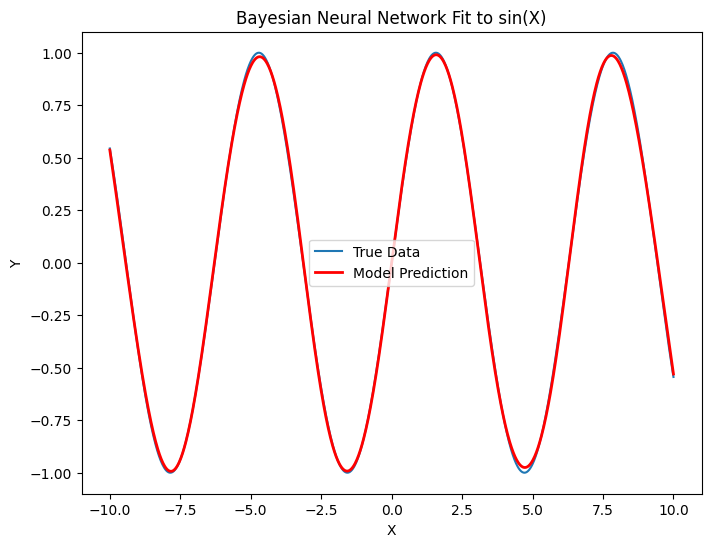

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

'''# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Distribution")
plt.show()'''

# Define the neural network architecture
class BayesianNeuralNetwork:
    def __init__(self, input_dim, hidden1, hidden2, output_dim, prior_std=np.sqrt(50/hidden1)):
        # Initialize weights and biases as TensorFlow variables
        initializer = tf.initializers.GlorotUniform()

        # Define trainable parameters (weights and biases)
        self.weights = [
            tf.Variable(initializer([input_dim, hidden1]), dtype=tf.float32),
            tf.Variable(initializer([hidden1, hidden2]), dtype=tf.float32),
            tf.Variable(initializer([hidden2, output_dim]), dtype=tf.float32)
        ]
        
        self.biases = [
            tf.Variable(tf.zeros([hidden1]), dtype=tf.float32),
            tf.Variable(tf.zeros([hidden2]), dtype=tf.float32),
            tf.Variable(tf.zeros([output_dim]), dtype=tf.float32)
        ]

        # Prior parameters (assuming Gaussian priors)
        self.prior_std = prior_std
        self.prior_vars = [
            tf.constant(self.prior_std**2, dtype=tf.float32) for _ in self.weights + self.biases
        ] # sigma**2. We assume that the prior is N(0, sigma**2).
        # for _ in self.weights + self.biases: create a list of prior_vars with the same length as weights and biases
        # So it creates a list of prior_vars for each weight and bias, total 6 elements in the list
        # The prior_std is the standard deviation of the prior, and we assume that the prior is N(0, sigma**2)

    def forward(self, X):
        # Layer 1 with tanh activation
        hidden1 = tf.matmul(X, self.weights[0]) + self.biases[0]
        hidden1_activation = tf.nn.tanh(hidden1)
        
        # Layer 2 with tanh activation
        hidden2 = tf.matmul(hidden1_activation, self.weights[1]) + self.biases[1]
        hidden2_activation = tf.nn.tanh(hidden2)
        
        # Output layer (linear activation)
        output = tf.matmul(hidden2_activation, self.weights[2]) + self.biases[2]
        return output

    def log_prior(self): # Role: Define initial beliefs about each parameter, acting as regularizers.
        # Compute log prior probability of weights and biases
        log_prior = 0.0
        for var, var_prior_var in zip(self.weights + self.biases, self.prior_vars): 
            # Assuming Gaussian prior: log p(w) = -0.5 * log(2πσ²) - w²/(2σ²)
            #log_prior += -0.5 * tf.reduce_sum(tf.math.log(2.0 * np.pi * var_prior_var**2)) # log(2πσ²)
            log_prior += -tf.reduce_sum(tf.square(var)) / (2.0 * var_prior_var**2) # -w²/(2σ²)
        log_prior_store.append(log_prior)
        return log_prior

    def log_likelihood(self, Y_true, Y_pred, likelihood_std=np.std(Y)): # Role: Represents the probability of observing the data given the parameters, modeling how well the network fits the data.
        # Assuming Gaussian likelihood: p(Y|X,w) = N(Y_pred, σ²)
        # log p(Y|X,w) = -0.5 * log(2πσ²) - (Y - Y_pred)^2 / (2σ²)
        #log_likelihood = -0.5 * tf.cast(tf.size(Y_true), tf.float32) * tf.math.log(2.0 * np.pi * likelihood_std**2) # log(2πσ²)
        log_likelihood = 0.0
        log_likelihood += -tf.reduce_sum(tf.square(Y_true - Y_pred)) / (2.0 * likelihood_std**2) # -(Y - Y_pred)^2 / (2σ²)
        log_likelihood_store.append(log_likelihood)
        return log_likelihood

    def log_posterior(self, Y_true, Y_pred): # Role: Combines priors and likelihood to update beliefs about parameters after observing the data.
        # log posterior ∝ log likelihood + log prior
        #print("Likelihood:   ", self.log_likelihood(Y_true, Y_pred))
        #print("Prior:   ", self.log_prior())
        log_posterior_store.append(self.log_likelihood(Y_true, Y_pred) + self.log_prior())
        return self.log_likelihood(Y_true, Y_pred) + self.log_prior()

# Initialize the Bayesian neural network
input_dim = 1
hidden1 = 30
hidden2 = 30
output_dim = 1
prior_std = 1.0  # Standard deviation for the prior
log_prior_store = []
log_likelihood_store = []
log_posterior_store = []

model = BayesianNeuralNetwork(input_dim, hidden1, hidden2, output_dim)

# Define the loss function (negative log posterior)
def negative_log_posterior(model, Y_true, Y_pred):
    # We minimize the negative log posterior
    return -model.log_posterior(Y_true, Y_pred)

# Prepare the optimizer
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate)  # Adam often works better for Bayesian methods

# Training parameters
epochs = 10000
print_interval = 100
best_rmse = float('inf')
loss_all = []

# Convert data to TensorFlow tensors
X_tf = tf.convert_to_tensor(X)
Y_tf = tf.convert_to_tensor(Y)

# Training loop
for epoch in range(1, epochs + 1):

    with tf.GradientTape() as tape:
        # Forward pass
        Y_pred = model.forward(X_tf)
        # Compute negative log posterior
        loss = negative_log_posterior(model, Y_tf, Y_pred)
        loss_all.append(loss)
    
    # Compute gradients
    gradients = tape.gradient(loss, model.weights + model.biases) # Purpose of gradient: To update the weights and biases in the direction that minimizes the loss function.
    # Apply gradients
    optimizer.apply_gradients(zip(gradients, model.weights + model.biases))
    
    # Print loss every 'print_interval' epochs
    if epoch % print_interval == 0 or epoch == 1:
        print(f"Epoch {epoch}: Negative Log Posterior = {loss.numpy():.6f}")
        print(f"Anti Log Posterior = {np.exp(loss.numpy()):.6f}")
        rmse_train = tf.sqrt(tf.reduce_mean((Y_tf - Y_pred)**2))
        print(f"RMSE: {rmse_train.numpy():.10f}")

    # Save weights and biases only if lower rmse than before
    if rmse_train < best_rmse:
        best_rmse = rmse_train
        MAP_weights = model.weights
        MAP_biases = model.biases
        best_epoch = epoch
        if epoch % print_interval == 0 or epoch == 1:
            #print("Improvement in RMSE. Weights and biases saved.")
            print("----------------------------------------")
    else:
        if epoch % print_interval == 0 or epoch == 1:
            print("No improvement in RMSE. Weights and biases not saved.")
            print("----------------------------------------")
    

# After training, plot the model predictions
print(f"Best Epoch at: {best_epoch}")
plt.figure(figsize=(8, 6))
plt.plot(X, Y, alpha=1, label='True Data')
# Sort X for better visualization of the prediction curve
sorted_indices = np.argsort(X.squeeze())
X_sorted = X[sorted_indices]
Y_pred_sorted = Y_pred.numpy()[sorted_indices]
plt.plot(X_sorted, Y_pred_sorted, color='red', label='Model Prediction', linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Bayesian Neural Network Fit to sin(X)")
plt.legend()
plt.show()

Best epoch at:  6100
RMSE: 0.01308733
Loss: 9.73396587
Anti Log Posterior = 16881.369141


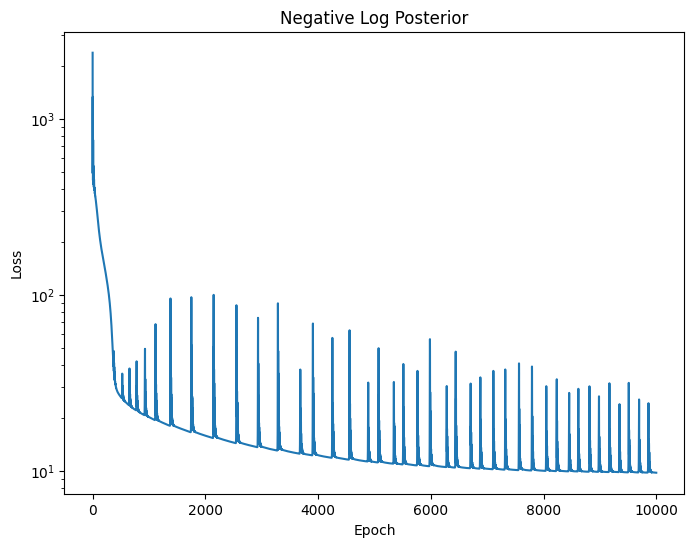

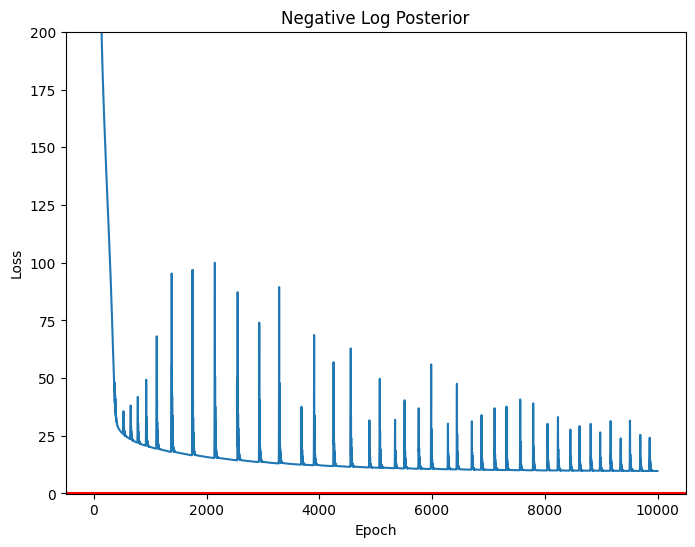

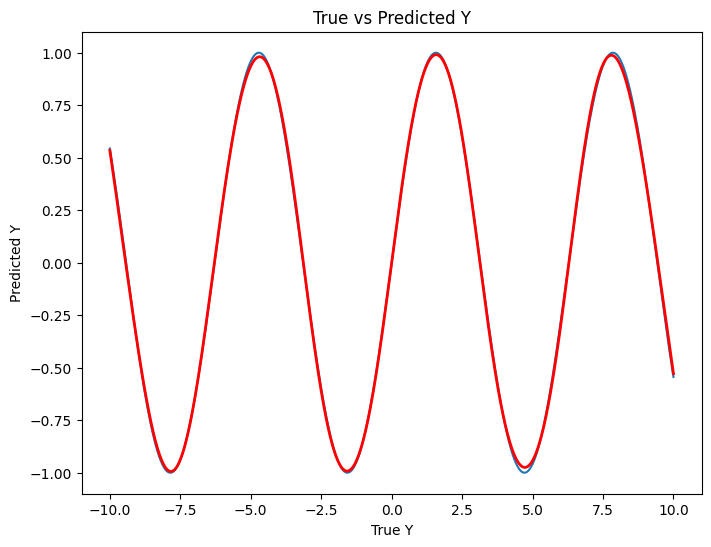

In [82]:
# Print RMSE
model.weights = MAP_weights
model.biases = MAP_biases
Y_pred = model.forward(X_tf)
rmse = tf.sqrt(tf.reduce_mean(tf.square(Y - Y_pred)))
print("Best epoch at: ", best_epoch)
print(f"RMSE: {rmse.numpy():.8f}")

# Convert loss to anti-log
print(f"Loss: {(loss.numpy()):.8f}")
print(f"Anti Log Posterior = {np.exp(loss.numpy()):.6f}")

# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(loss_all)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Negative Log Posterior")
plt.yscale('log')
plt.show()

# Plot loss at y=0 +- 0.1
plt.figure(figsize=(8, 6))
plt.plot(loss_all)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Negative Log Posterior")
plt.ylim(-0.1, 200.1)
plt.show()

# Plot true vs predicted
plt.figure(figsize=(8, 6))
plt.plot(X, Y, alpha=1, label='True Data')
plt.plot(X, Y_pred, color='red', label='Model Prediction', linewidth=2)
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("True vs Predicted Y")
plt.show()

# Next steps:
# 1. Fix the negative log posterior loss and the log scale issue giving 0.0000000000000000
# 2. Look at momentum values
# 3. Look at single weight/bias distributions
# 4. Go to PINN with new problem

In [83]:
# How BNN works:
# 1. Initialise a prior distribution based on the weights and biases of the neural network.
# 2. Compute the likelihood of the data given the model.
# 3. Compute the posterior distribution using Bayes' rule.
# 4. Update the model parameters based on the posterior distribution.
# 5. Repeat steps 2-4 until convergence.

# After training, we want to create a distribution of predictions for each input data point, this is done by sampling from the posterior distribution of the weights and biases.
# The best weights and biases are the ones that minimize the negative log posterior, which is equivalent to maximizing the log posterior.
# These best weights and biases are the MAP (Maximum A Posteriori) estimate of the model parameters.
# However, we are interested in the distribution of predictions, not just a single point estimate.
# Then we do:
# 1. Sample unique weights and biases from the posterior distribution.
# 2. Compute prior and likelihood for each sample.
# 3. Compute the posterior for each sample.
# 4. Make predictions using each sample.
# 5. Compute the mean and standard deviation of the predictions for each input data point.
# The unique prior, likelihood, and posterior for each sample are used to compute the predictive distribution of the model.

# Example:
# Model structure; 
# Input(x): 10*1
# Weight: 10*10
# Bias: 10*1
# Output: 10*1
# y = Wx + b

# Bayesian;
# Prior: p(w) = N(0, 1)
# Likelihood: p(y|x, w) = N(y; Wx + b, σ²)
# Posterior: p(w|y,x) = p(y|x,w)p(w) / p(y|x)

# Loss function;
# Loss(W, b) = -log p(w|y,x) = -log p(y|x,w)p(w) + log p(y|x) > in terms of Negative Log Posterior
# Loss(W, b) = 1/2σ² * ||y - Wx - b||² + 1/2 * ||w||² + 1/2 * ||b||² + C > in terms of model parameters
# So we need to minimize the loss function to find the best weights and biases.

# Training;
# 1. Initialize weights and biases.
# 2. Compute the loss function.
# 3. Compute the gradients of the loss function with respect to the weights and biases.
# 4. Update the weights and biases using the gradients.
# 5. Repeat steps 2-4 until convergence.

# Prediction (Using trained model), sampling using HMC (Hamiltonian Monte Carlo); 
# 1. Initialise MAP estimate of the weights and biases.
# 2. Momentum sampling: sample momentum from a Gaussian distribution.
# 3. Leapfrog integration: update the weights and biases using Hamiltonian dynamics.
# 4. Accept or reject the new sample based on the Metropolis-Hastings criterion.
# Example:
# We want to sample 1000 times. This samples are unique weights and biases for the model which are used to compute the predictive distribution.
# 1. Define the log posterior function, which is the negative log posterior, log(posterior) = -log(prior) - log(likelihood)
# log p(w|y,x) = -log p(y|x,w)p(w) + log p(y|x) = -1/2 log(2πσ²) - (y - Wx - b)² / 2σ² - 1/2 log(2π) - 1/2 log(1) - 1/2 ||w||² - 1/2 ||b||²
# 2. Compute gradients of the log posterior function.
# d/dw log p(w|y,x) = -1/σ² * (y - Wx - b) * x + w
# d/db log p(w|y,x) = -1/σ² * (y - Wx - b) + b
# 3. Initilisate MAP estimate of the weights and biases.
# Lets say momentum sampling mass matrix, M = 1
# Step size, ε = 0.01, number of leapfrog steps, L = 10 for leapfrog integration.
# 4. Leapfrog integration; for each leapfrog step l = 1, 2, ..., L
# Half-step momentum update: p^(l-1/2) = p^(l-1) - ε/2 * ∇log p(w^(l-1)|y,x)
# Full-step position update: w^(l) = w^(l-1) + ε * M^(-1) * p^(l-1/2)
# Half-step momentum update: p^(l) = p^(l-1/2) - ε/2 * ∇log p(w^(l)|y,x)
# Example of calculation; say σ = 0.1, x = 2, y = 0.9093, w = 0.5, b = -0.1, p^(0) is N(0,1) then p^(0) = 0.1
# Gradient = d/dw log p(w|y,x) = -1/σ² * (y - Wx - b) * x + w = -1/0.01 * (0.9093 - 0.5*2 - (-0.1)) * 2 + 0.5 = 0.5
# Half-step momentum update: p^(0.5) = 0 - 0.01/2 * 0.5 = -0.0025
# Full-step position update: w^(1) = 0.5 + 0.01 * 1 * -0.0025 = 0.4975
# Gradient = d/db log p(w|y,x) = -1/σ² * (y - Wx - b) + b = -1/0.01 * (0.9093 - 0.4975*2 - (-0.1)) + (-0.1) = 0.1
# Half-step momentum update: p^(1) = -0.0025 - 0.01/2 * 0.1 = -0.0025 - 0.0005 = -0.003
# Repeat the process for L = 10 steps.
# 5. Compute the Hamiltonian, H = -log p(w|y,x) + 1/2 * p^T * M^(-1) * p
# 6. Accept or reject the new sample based on the Metropolis-Hastings criterion.
# if w^(1) = 0.4975 is accepted, then w^(1) is the new sample, if not, w^(0) = 0.5 is the new sample.
# 7. Repeat steps 4-6 until we have 1000 samples.

In [84]:
# Sampling;

# Initialise MAP from model parameters
model.weights = MAP_weights
model.biases = MAP_biases
MAP = model.weights + model.biases
samples = []
new_sample = []
propose_H = 0

# Hyperparameters for HMC
num_samples = 100
step_size = 0.001
num_leapfrog_steps = 100

# Get gradients of the log posterior with respect to the model parameters
def grad_log_posterior(model, X, Y):
    with tf.GradientTape() as tape:
        Y_pred = model.forward(X)
        loss = negative_log_posterior(model, Y, Y_pred)
    return tape.gradient(loss, model.weights + model.biases)

# Hamiltonian Monte Carlo sampling
def hmc_sampling(model, X, Y, num_samples, step_size, num_leapfrog_steps):
    samples = [] # List to store samples
    current_sample = MAP # Start from the MAP estimate
    #current_log_prob = negative_log_posterior(model, Y, model.forward(X)).numpy()

    num_accepted = 0
    num_rejected = 0

    for k in range(num_samples):
        # Sample momentum from a Gaussian distribution
        momentum = [tf.random.normal(w.shape) for w in current_sample]
        '''# Plot momentum distribution
        print("Momentum size:" , momentum[1].numpy().ravel().shape)
        plt.figure(figsize=(10, 5))
        plt.hist(momentum[1].numpy().ravel(), bins=50)
        plt.title('Momentum')
        plt.show()'''

        # Compute the current and proposed log probabilities
        current_H = negative_log_posterior(model, Y, model.forward(X)).numpy() + 0.5 * sum((m**2).numpy().sum() for m in momentum)
        
        momentum_norm_list = []

        # Leapfrog integration
        new_sample = samples[-1] if samples else current_sample
        
        for l in range(num_leapfrog_steps):
            # Make a half step for momentum at the beginning
            momentum = [m - 0.5 * step_size * g for m, g in zip(momentum, grad_log_posterior(model, X, Y))]

            # Calculate the momentum norm for each weight and bias
            momentum_norm = [tf.norm(m).numpy() for m in momentum]

            # Append the momentum norm to the list
            momentum_norm_list.append(momentum_norm)

            # Make a full step for the position
            new_sample = [w + step_size * m for w, m in zip(new_sample, momentum)]
            new_sample = [tf.Variable(w) for w in new_sample] 
            model.weights = new_sample[:3]
            model.biases = new_sample[3:]
            # Make a full step for the momentum, except at the end of the trajectory
            if l < num_leapfrog_steps - 1:
                momentum = [m - 0.5 * step_size * g for m, g in zip(momentum, grad_log_posterior(model, X, Y))]

            #print("Step: ", l+1)
            #print("Momentum Norm: ", momentum_norm)
        '''# Plot momentum norm
        plt.figure(figsize=(10, 5))
        plt.plot(momentum_norm_list)
        plt.title('Momentum Norm')
        plt.show()'''

                            
        proposed_H = negative_log_posterior(model, Y, model.forward(X)).numpy() + 0.5 * sum((m**2).numpy().sum() for m in momentum)
        #print("Proposed Log Prob: ", proposed_log_prob)

        #print("h: ", current_H - proposed_H, "--------- Sample: ", k + 1)

        # Accept or reject the new sample
        p = np.random.uniform()
        alpha = min(1, np.exp(proposed_H - current_H))
        if p >= alpha: # alpha >= p  or p <= alpha
            print("Accepted")
            num_accepted = num_accepted + 1
            current_sample = new_sample
            samples.append(current_sample)
        else:
            print("Rejected")
            num_rejected = num_rejected + 1
            current_sample = current_sample

        #samples.append(current_sample)

        # Print p and alpha
        print("p: ", p, " AND alpha: ", alpha)

        # Acceptance rate
        acceptance_rate = 100 * num_accepted / (num_accepted + num_rejected)
        print("Acceptance Rate: ", acceptance_rate)
        print("-------------------------- Sample: ", k+1, "--------------------------------")

    return samples

# Perform HMC sampling
samples = hmc_sampling(model, X_tf, Y_tf, num_samples, step_size, num_leapfrog_steps)

Rejected
p:  0.3745401188473625  AND alpha:  0.9160318647556702
Acceptance Rate:  0.0
-------------------------- Sample:  1 --------------------------------
Accepted
p:  0.9507143064099162  AND alpha:  9.828457354202405e-07
Acceptance Rate:  50.0
-------------------------- Sample:  2 --------------------------------
Rejected
p:  0.7319939418114051  AND alpha:  1
Acceptance Rate:  33.333333333333336
-------------------------- Sample:  3 --------------------------------
Rejected
p:  0.5986584841970366  AND alpha:  1
Acceptance Rate:  25.0
-------------------------- Sample:  4 --------------------------------
Rejected
p:  0.15601864044243652  AND alpha:  0.3689850082692994
Acceptance Rate:  20.0
-------------------------- Sample:  5 --------------------------------
Rejected
p:  0.15599452033620265  AND alpha:  1
Acceptance Rate:  16.666666666666668
-------------------------- Sample:  6 --------------------------------
Rejected
p:  0.05808361216819946  AND alpha:  1
Acceptance Rate:  14.28

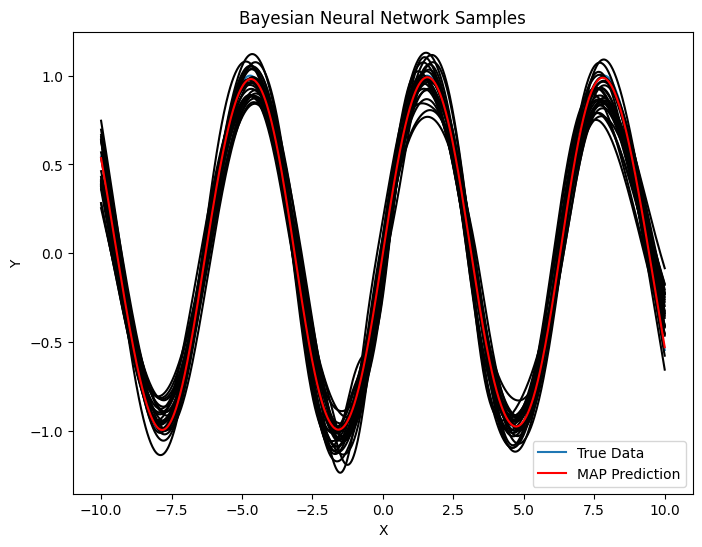

In [85]:
# Plot the samples
plt.figure(figsize=(8, 6))
plt.plot(X, Y, alpha=1, label='True Data')
for sample in samples:
    model.weights = sample[:3]
    model.biases = sample[3:]
    Y_pred = model.forward(X_tf)
    # Plot the model predictions
    if tf.sqrt(tf.reduce_mean(tf.square(Y - Y_pred))) < 10000:
        plt.plot(X, Y_pred.numpy(), color='black', alpha=1)
model.weights = MAP_weights
model.biases = MAP_biases
plt.plot(X, model.forward(X_tf).numpy(), color='red', alpha=1, label='MAP Prediction')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Bayesian Neural Network Samples")
plt.legend()    
plt.show()

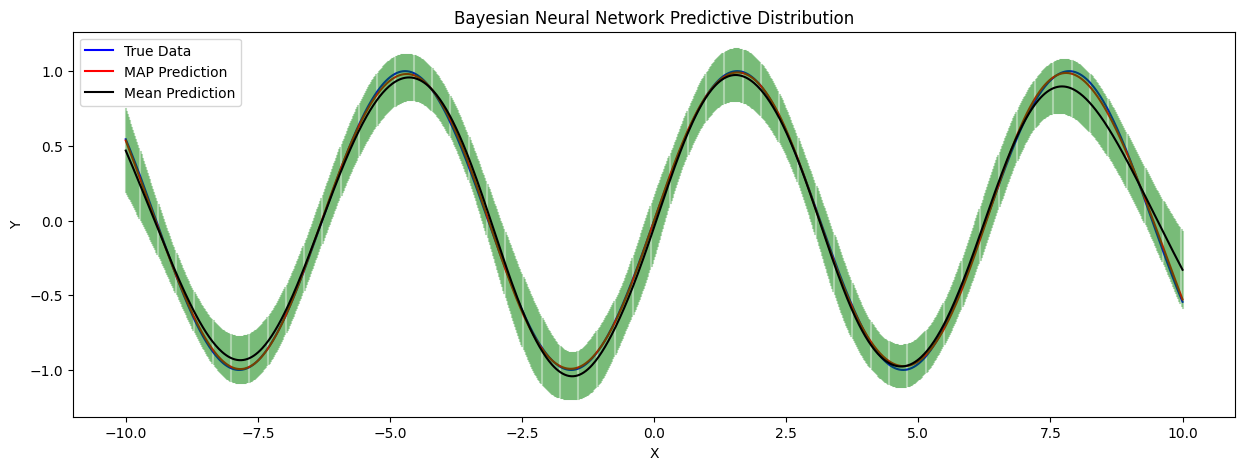

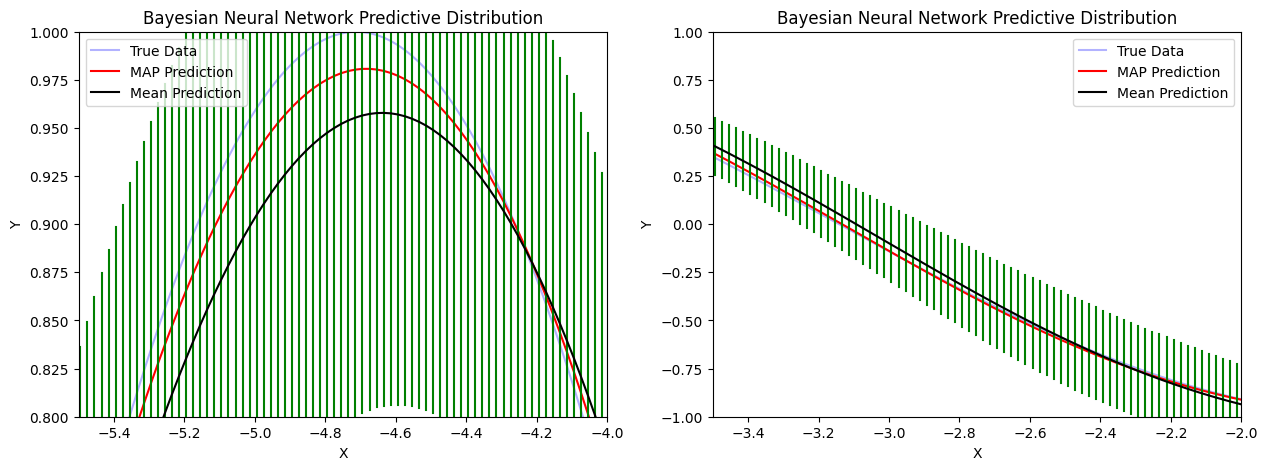

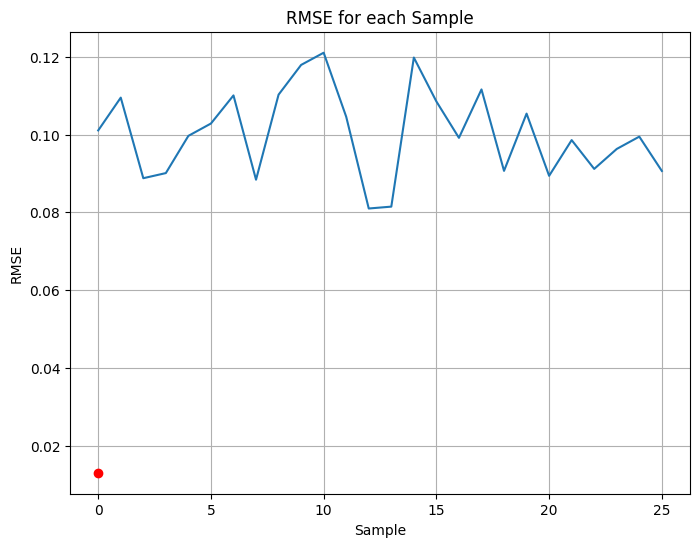

In [86]:
# Predictive distribution;
plt.figure(figsize=(15, 5))
plt.plot(X, Y, alpha=1, color='blue', label='True Data')
model.weights = MAP_weights
model.biases = MAP_biases
plt.plot(X, model.forward(X_tf).numpy(), color='red', label='MAP Prediction')
Y_preds_sampled = []
for sample in samples:
    model.weights = sample[:3]
    model.biases = sample[3:]
    Y_pred = model.forward(X_tf)
    Y_preds_sampled.append(Y_pred)
Y_preds_sampled = np.array(Y_preds_sampled)
Y_mean = np.mean(Y_preds_sampled, axis=0)
Y_std = np.std(Y_preds_sampled, axis=0)
# Plot the confidence interval
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y_mean[i] - 2 * Y_std[i], Y_mean[i] + 2 * Y_std[i]], color='green', alpha=0.3)
plt.plot(X, Y_mean, color='black', label='Mean Prediction')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Bayesian Neural Network Predictive Distribution")
plt.legend()
plt.show()

# Plot samething but zoom into x = -5 and y = 0.8 to 1.00
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(X, Y, alpha=0.3, color='blue', label='True Data')
model.weights = MAP_weights
model.biases = MAP_biases
plt.plot(X, model.forward(X_tf).numpy(), color='red', label='MAP Prediction')
Y_preds_sampled = []
for sample in samples:
    model.weights = sample[:3]
    model.biases = sample[3:]
    Y_pred = model.forward(X_tf)
    Y_preds_sampled.append(Y_pred)
Y_preds_sampled = np.array(Y_preds_sampled)
Y_mean = np.mean(Y_preds_sampled, axis=0)
Y_std = np.std(Y_preds_sampled, axis=0)
# Plot the confidence interval
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y_mean[i] - 2 * Y_std[i], Y_mean[i] + 2 * Y_std[i]], color='green', alpha=1)
plt.plot(X, Y_mean, color='black', label='Mean Prediction')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Bayesian Neural Network Predictive Distribution")
plt.legend()
plt.xlim(-5.5, -4)
plt.ylim(0.8, 1.0)

plt.subplot(1, 2, 2)
plt.plot(X, Y, alpha=0.3, color='blue', label='True Data')
model.weights = MAP_weights
model.biases = MAP_biases
plt.plot(X, model.forward(X_tf).numpy(), color='red', label='MAP Prediction')
Y_preds_sampled = []
for sample in samples:
    model.weights = sample[:3]
    model.biases = sample[3:]
    Y_pred = model.forward(X_tf)
    Y_preds_sampled.append(Y_pred)
Y_preds_sampled = np.array(Y_preds_sampled)
Y_mean = np.mean(Y_preds_sampled, axis=0)
Y_std = np.std(Y_preds_sampled, axis=0)
# Plot the confidence interval
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y_mean[i] - 2 * Y_std[i], Y_mean[i] + 2 * Y_std[i]], color='green', alpha=1)
plt.plot(X, Y_mean, color='black', label='Mean Prediction')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Bayesian Neural Network Predictive Distribution")
plt.legend()
plt.xlim(-3.5, -2)
plt.ylim(-1, 1)

plt.show()



# Plot RMSE for each sample
RMSEs = []
for sample in samples:
    model.weights = sample[:3]
    model.biases = sample[3:]
    Y_preds_sampled = model.forward(X_tf)
    RMSEs.append(tf.sqrt(tf.reduce_mean(tf.square(Y - Y_preds_sampled))))
plt.figure(figsize=(8, 6))
plt.plot(rmse, marker='o', linestyle='-', color='red')
plt.plot(RMSEs)
plt.grid()
plt.xlabel("Sample")
plt.ylabel("RMSE")
plt.title("RMSE for each Sample")
plt.show()

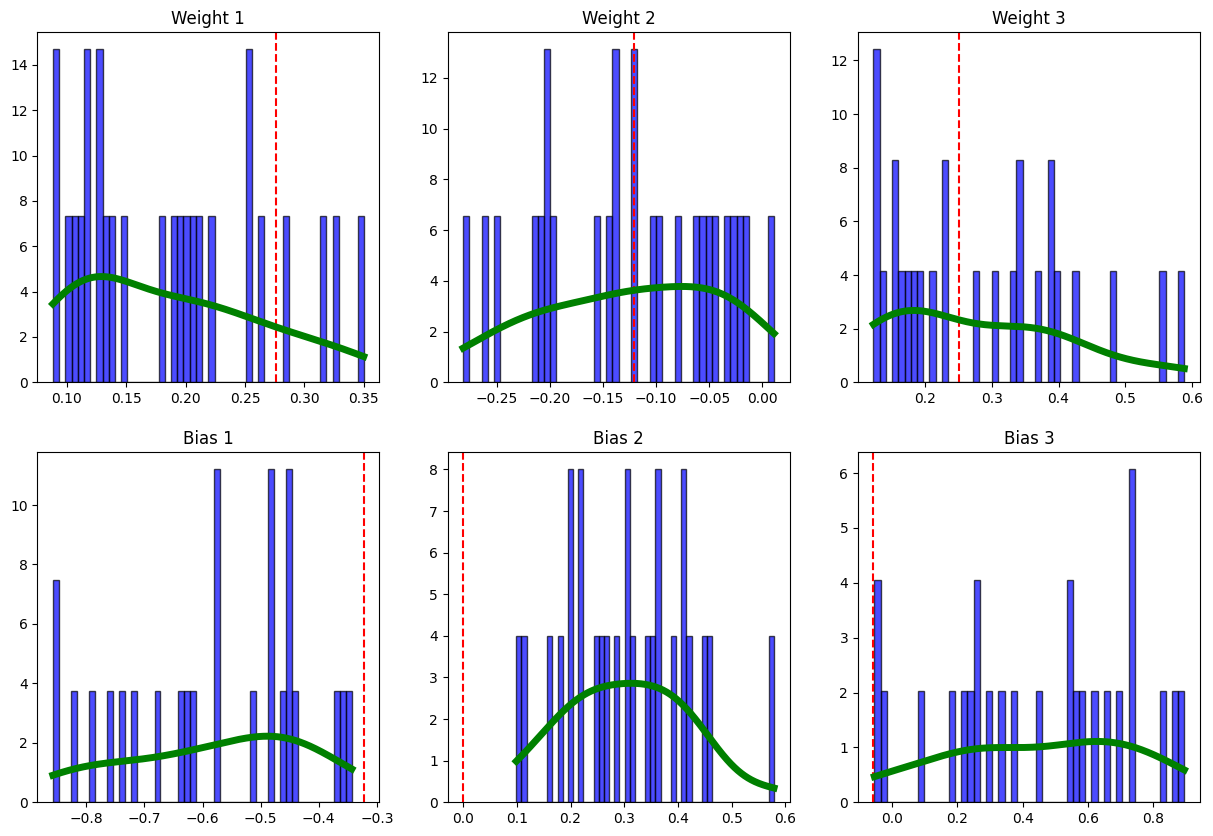

In [87]:
# Plot distribution for first value of weights and biases in subplots
from scipy.stats import gaussian_kde

# Function to plot curve of distribution
def plot_distribution_curve(flattened_samples, title):
    kde = gaussian_kde(flattened_samples)
    x_vals = np.linspace(min(flattened_samples), max(flattened_samples), 1000)
    kde_vals = kde(x_vals)
    plt.plot(x_vals, kde_vals, color='green', label='Distribution', linewidth=5)
    plt.title(title)

plt.figure(figsize=(15, 10))
# First weight
plt.subplot(2, 3, 1)
flattened_samples_w1 = [sample[0][0][0].numpy() for sample in samples]
plt.hist(flattened_samples_w1, bins=50, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.axvline(x=MAP_weights[0][0][0].numpy(), color='red', linestyle='--', label='MAP Estimate')
plot_distribution_curve(flattened_samples_w1, 'Weight 1')
plt.title('Weight 1')
# Second weight
plt.subplot(2, 3, 2)
flattened_samples_w2 = [sample[0][0][1].numpy() for sample in samples]
plt.hist(flattened_samples_w2, bins=50, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.axvline(x=MAP_weights[0][0][1].numpy(), color='red', linestyle='--')
plot_distribution_curve(flattened_samples_w2, 'Weight 2')
plt.title('Weight 2')
# Third weight
plt.subplot(2, 3, 3)
flattened_samples_w3 = [sample[0][0][2].numpy() for sample in samples]
plt.hist(flattened_samples_w3, bins=50, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.axvline(x=MAP_weights[0][0][2].numpy(), color='red', linestyle='--')
plot_distribution_curve(flattened_samples_w3, 'Weight 3')
plt.title('Weight 3')

# First bias
plt.subplot(2, 3, 4)
flattened_samples_b1 = [sample[3][0].numpy() for sample in samples]
plt.hist(flattened_samples_b1, bins=50, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.axvline(x=MAP_biases[0][0].numpy(), color='red', linestyle='--')
plot_distribution_curve(flattened_samples_b1, 'Bias 1')
plt.title('Bias 1')
# Second bias
plt.subplot(2, 3, 5)
flattened_samples_b2 = [sample[4][0].numpy() for sample in samples]
plt.hist(flattened_samples_b2, bins=50, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.axvline(x=MAP_biases[1][0].numpy(), color='red', linestyle='--')
plot_distribution_curve(flattened_samples_b2, 'Bias 2')
plt.title('Bias 2')
# Third bias
plt.subplot(2, 3, 6)
flattened_samples_b3 = [sample[5][0].numpy() for sample in samples]
plt.hist(flattened_samples_b3, bins=50, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.axvline(x=MAP_biases[2][0].numpy(), color='red', linestyle='--')
plot_distribution_curve(flattened_samples_b3, 'Bias 3')
plt.title('Bias 3')

plt.show()


In [88]:

# Print MAP for first layer weights
print("MAP: ", MAP[0][0]) # [0] is the first layer
print("MAP: ", MAP[0][0][0]) # [0] is the first neuron in the first layer, [0][1]  

print("MAP: ", MAP_weights[0][0])
print("MAP: ", MAP_weights[0][0][0].numpy())   

ggg = MAP_weights + MAP_biases

print("MAP: ", ggg[0][0]) # [0] is the first layer
print("MAP: ", ggg[0][0][0]) # [0] is the first neuron in the first layer, [0][1]  

print("MAP: ", MAP_weights[0][0])
print("MAP: ", MAP_weights[0][0][0].numpy())  

# Print MAP for first layer weights
print("MAP: ", MAP[3]) # [0] is the first layer
print("MAP: ", MAP[3][0]) # [0] is the first neuron in the first layer, [0][1]  

print("MAP: ", MAP_biases[0])
print("MAP: ", MAP_biases[0][0].numpy())   

# Print first sample for first layer weights
print("Sample: ", samples[0][3])
print("Sample: ", samples[0][3][0])



MAP:  tf.Tensor(
[ 0.27582145 -0.1208312   0.25187498  0.07989034  0.16213563 -0.30506778
  0.18801881  0.30052328 -0.10531346  0.26778132 -0.40300637 -0.30314147
 -0.07666551  0.25606722 -0.29869813  0.28429064 -0.3534579   0.168747
 -0.27188006 -0.14792053 -0.07807468 -0.30906275  0.22536877  0.07705212
 -0.29491243 -0.30821395  0.2788095   0.153675   -0.08354875 -0.292401  ], shape=(30,), dtype=float32)
MAP:  tf.Tensor(0.27582145, shape=(), dtype=float32)
MAP:  tf.Tensor(
[ 0.27582145 -0.1208312   0.25187498  0.07989034  0.16213563 -0.30506778
  0.18801881  0.30052328 -0.10531346  0.26778132 -0.40300637 -0.30314147
 -0.07666551  0.25606722 -0.29869813  0.28429064 -0.3534579   0.168747
 -0.27188006 -0.14792053 -0.07807468 -0.30906275  0.22536877  0.07705212
 -0.29491243 -0.30821395  0.2788095   0.153675   -0.08354875 -0.292401  ], shape=(30,), dtype=float32)
MAP:  0.27582145
MAP:  tf.Tensor(
[ 0.27582145 -0.1208312   0.25187498  0.07989034  0.16213563 -0.30506778
  0.18801881  0.3005

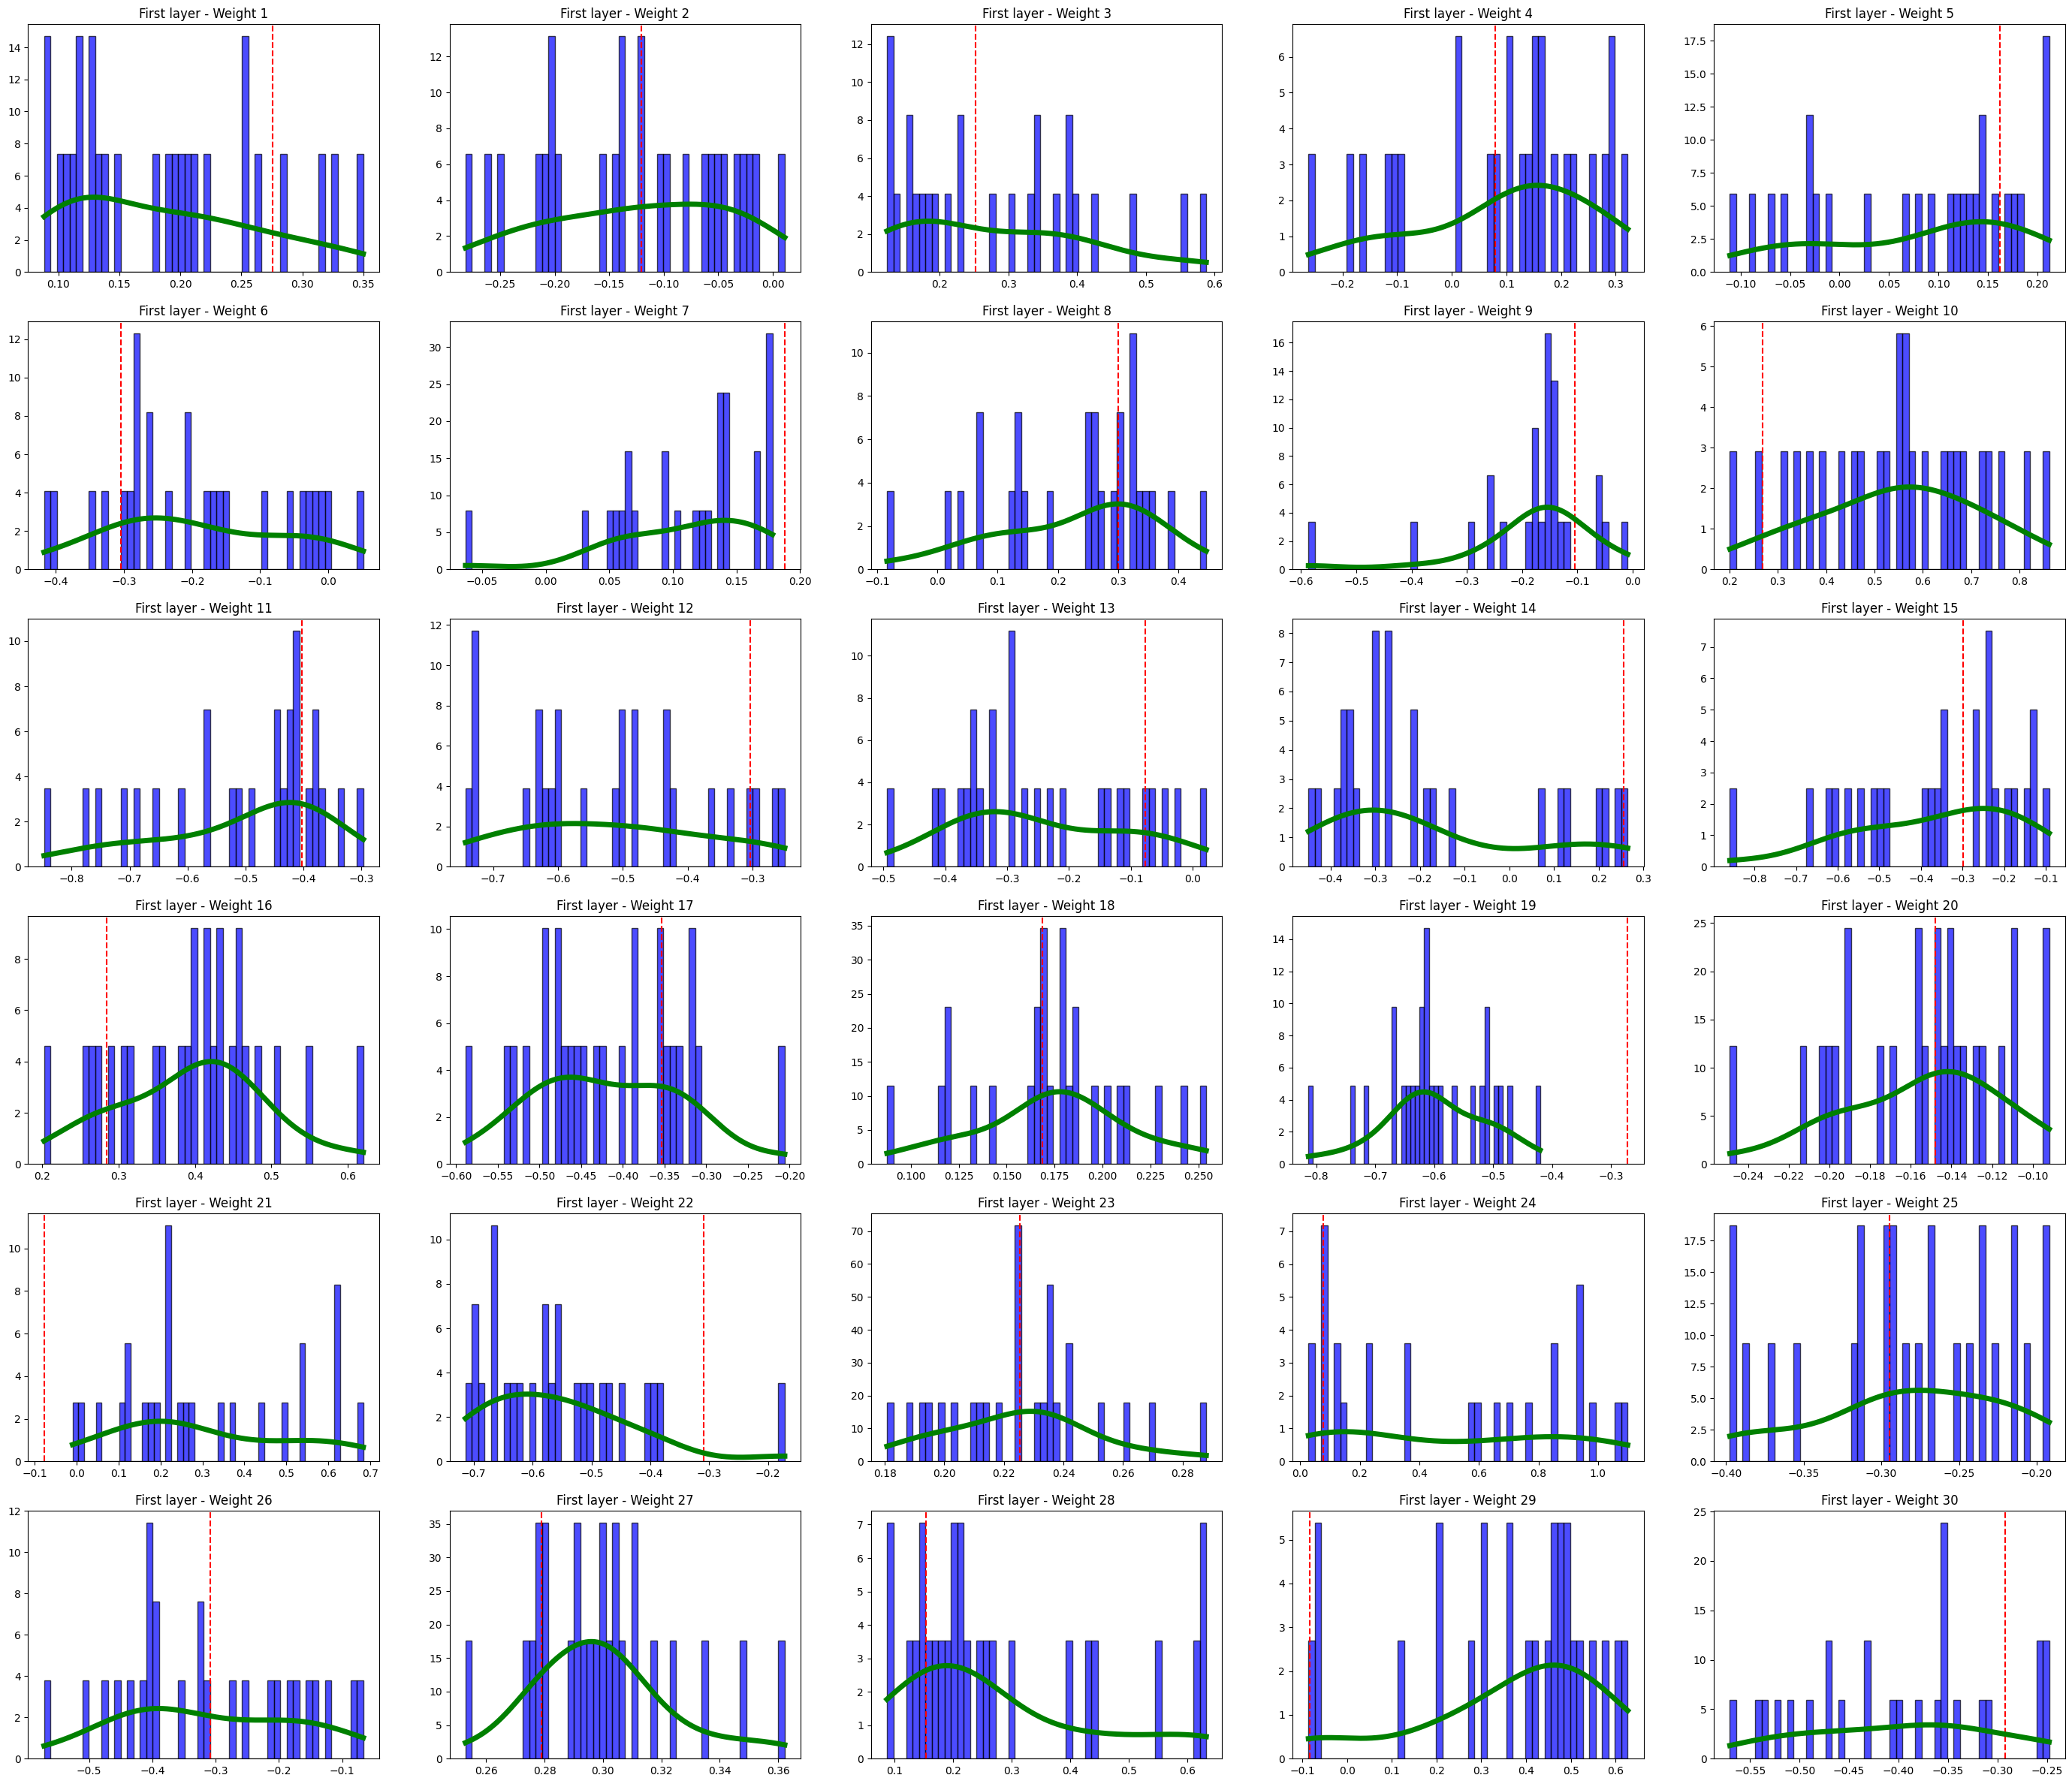

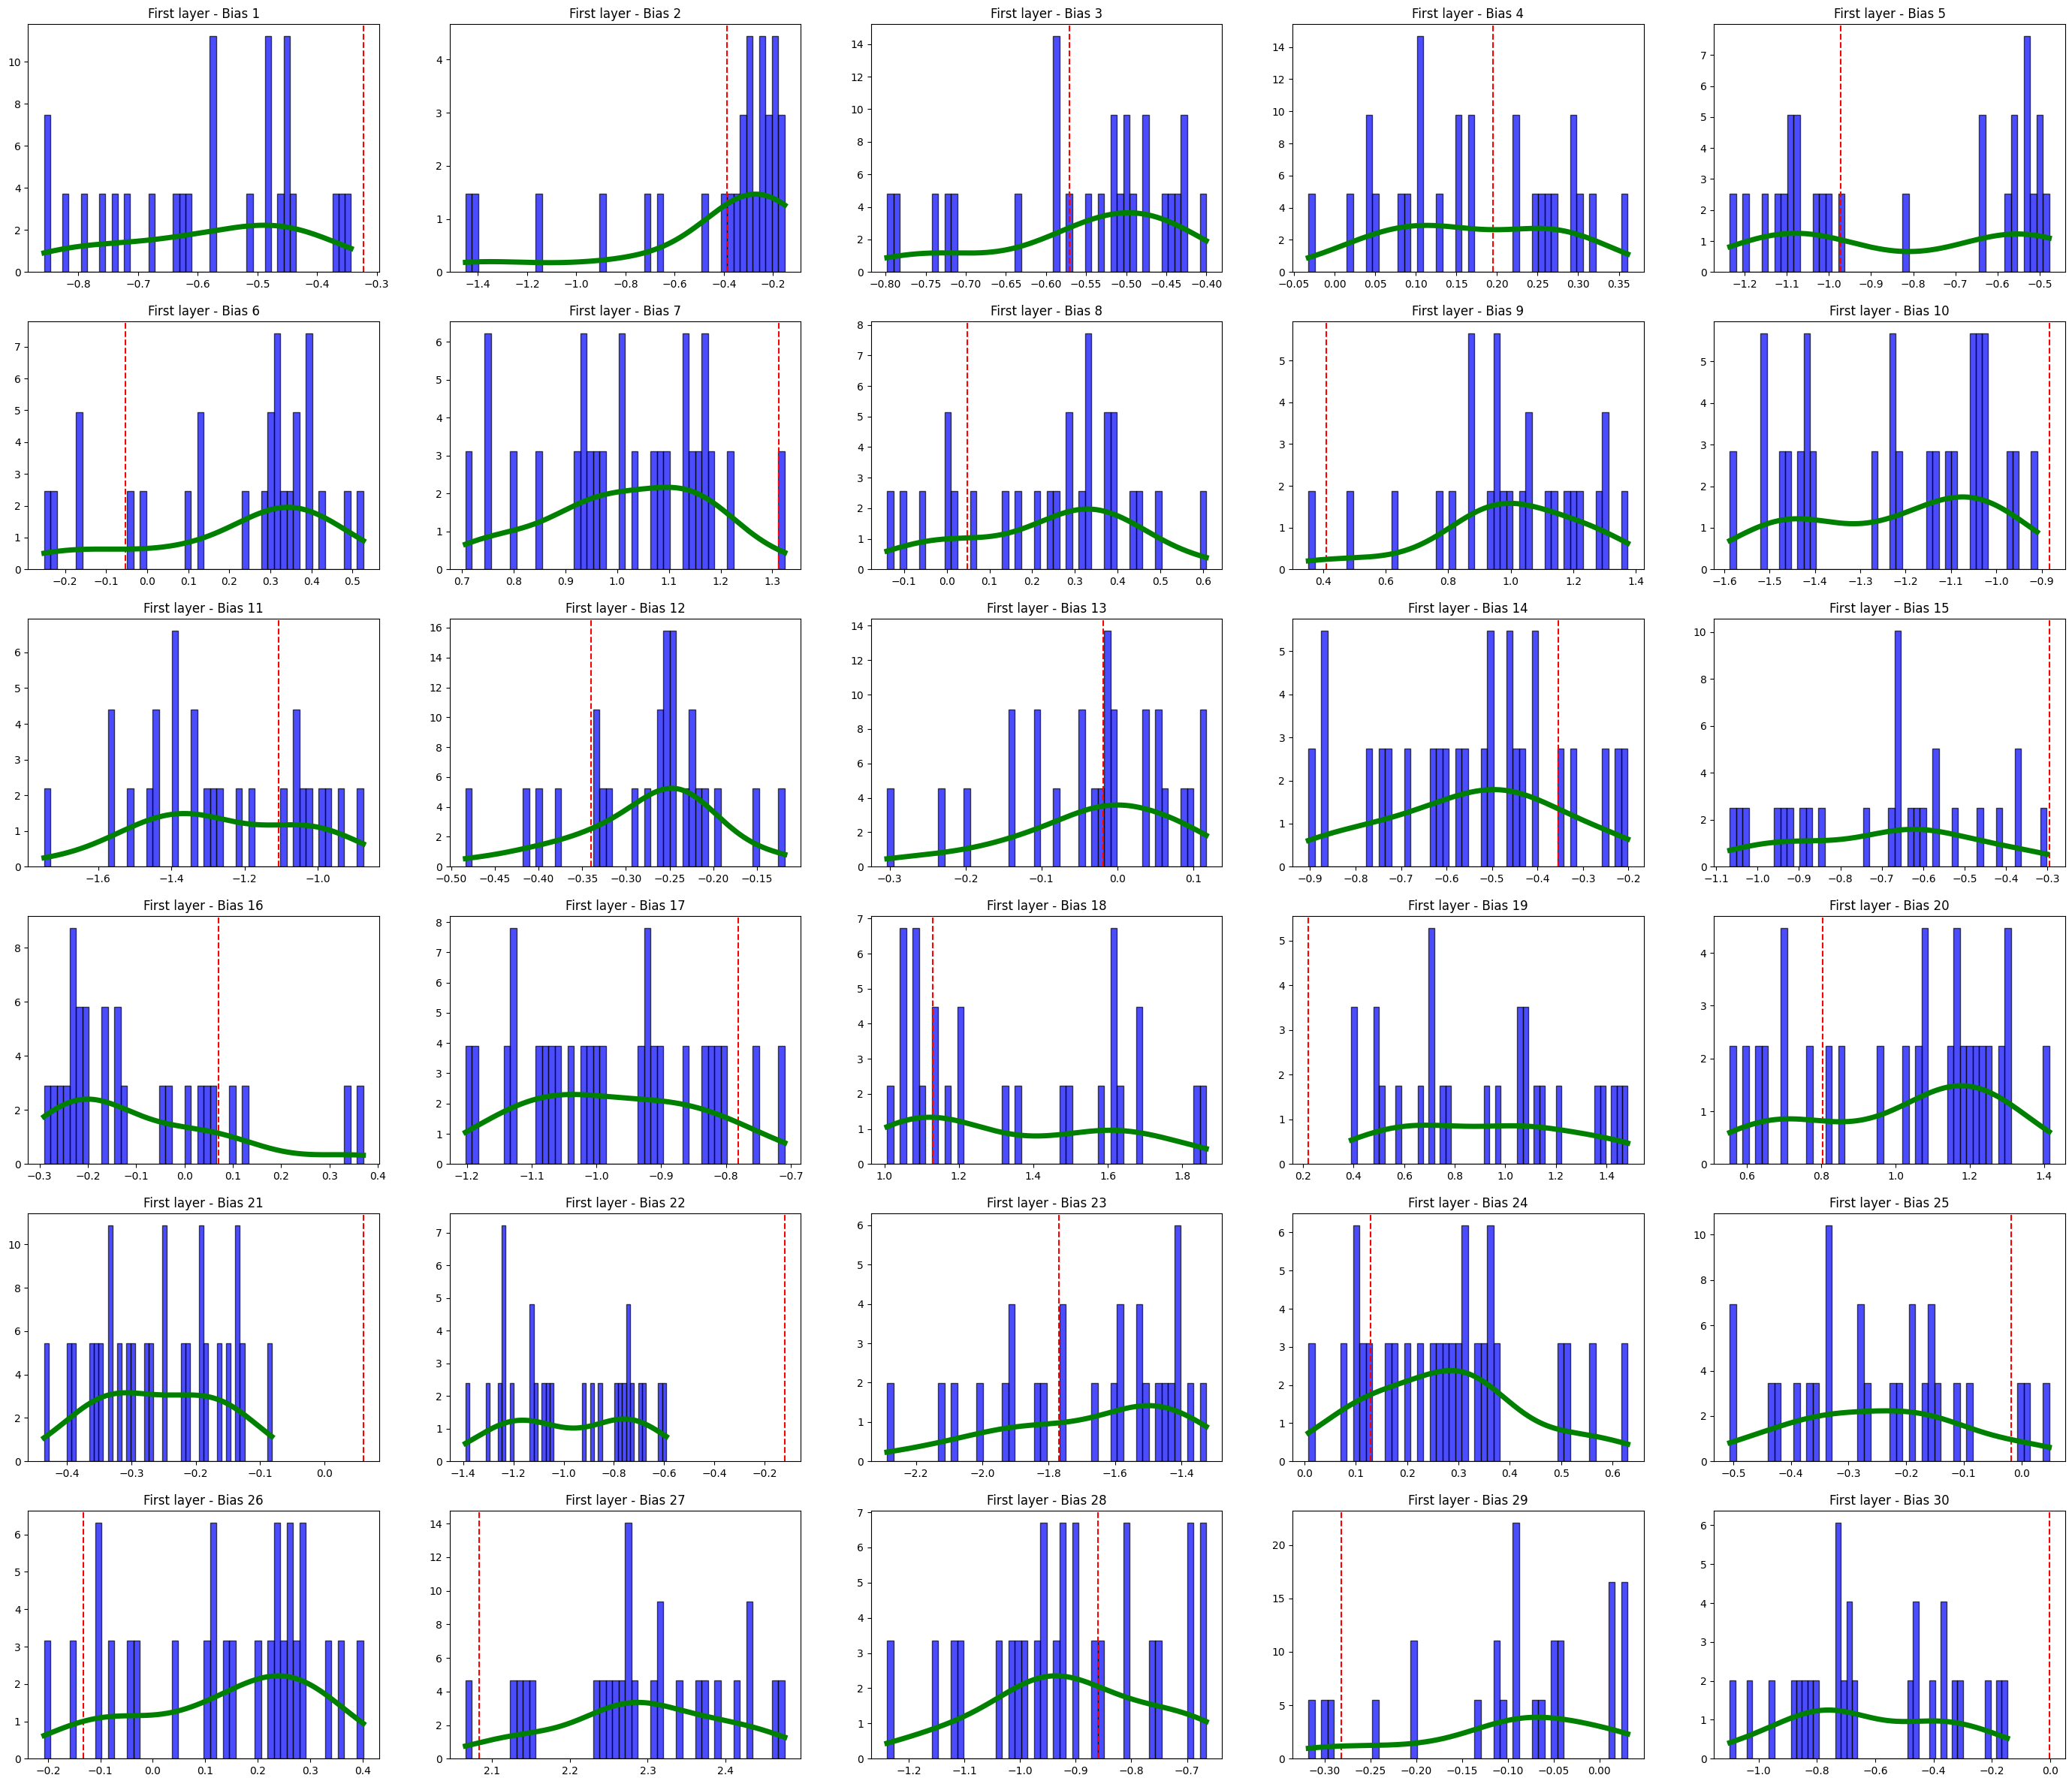

'# Do animation of plotting all samples weights using ion\nfrom IPython.display import clear_output\n\nplt.ion()\nfor i in range(0, len(samples[0][0][0])):\n    plt.figure(figsize=(8, 6))\n    clear_output(wait=True)\n    print("MAP: ", MAP_weights[0][0][i], "Sample: ", samples[0][0][0][i])\n    plot_distribution_weight(samples, MAP_weights, i, \'First layer - Weight \' + str(i+1))\n    plt.pause(0.01)\n    plt.show()'

In [89]:
# Create a function to plot the distribution of the weights and biases
def plot_distribution_weight(samples, MAP, parameter_no, layer, title):
    flattened_samples = [sample[layer][0][parameter_no].numpy() for sample in samples]
    plt.hist(flattened_samples, bins=50, alpha=0.7, color='blue', edgecolor='black', density=True)
    plt.axvline(x=MAP[layer][0][parameter_no].numpy(), color='red', linestyle='--')  
    plot_distribution_curve(flattened_samples, title) 
    plt.title(title)

def plot_distribution_bias(samples, MAP, parameter_no, layer, title):
    flattened_samples = [sample[layer+3][parameter_no].numpy() for sample in samples]
    plt.hist(flattened_samples, bins=50, alpha=0.7, color='blue', edgecolor='black', density=True)
    plt.axvline(x=MAP[layer][parameter_no].numpy(), color='red', linestyle='--')  
    plot_distribution_curve(flattened_samples, title) 
    plt.title(title)

# First layer weights
plt.figure(figsize=(35, 30))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plot_distribution_weight(samples, MAP_weights, i, 0,'First layer - Weight ' + str(i+1))
plt.show()

# First layer biases
plt.figure(figsize=(35, 30))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plot_distribution_bias(samples, MAP_biases, i, 0, 'First layer - Bias ' + str(i+1))
plt.show()

'''# Do animation of plotting all samples weights using ion
from IPython.display import clear_output

plt.ion()
for i in range(0, len(samples[0][0][0])):
    plt.figure(figsize=(8, 6))
    clear_output(wait=True)
    print("MAP: ", MAP_weights[0][0][i], "Sample: ", samples[0][0][0][i])
    plot_distribution_weight(samples, MAP_weights, i, 'First layer - Weight ' + str(i+1))
    plt.pause(0.01)
    plt.show()'''
